In [4]:
pip install pandas_datareader


     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/109.5 kB 1.3 MB/s eta 0:00:01
     -------------------------------- ------ 92.2/109.5 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 109.5/109.5 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas_datareader as pdr

In [11]:
api_key = 'c509a1d60a11483596a8949aca1597f30810715c'
df = pdr.get_data_tiingo('AAPL', api_key=api_key)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6328\4187944539.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=api_key)


In [12]:
df.to_csv('AAPL.csv')

In [13]:
import pandas as pd

In [14]:
df=pd.read_csv('AAPL.csv')

In [17]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-10-15 00:00:00+00:00,217.36,221.83,217.27,221.16,30791007,52.039428,53.109617,52.017881,52.949208,123164028,0.0,1.0
1,AAPL,2018-10-16 00:00:00+00:00,222.15,222.99,216.76,218.93,29183963,53.186230,53.387339,51.895778,52.415311,116735852,0.0,1.0
2,AAPL,2018-10-17 00:00:00+00:00,221.19,222.64,219.34,222.30,22885397,52.956391,53.303544,52.513471,53.222142,91541588,0.0,1.0
3,AAPL,2018-10-18 00:00:00+00:00,216.02,219.74,213.00,217.86,32581315,51.718611,52.609238,50.995575,52.159136,130325260,0.0,1.0
4,AAPL,2018-10-19 00:00:00+00:00,219.31,221.26,217.43,218.06,33078726,52.506289,52.973150,52.056187,52.207019,132314904,0.0,1.0


In [18]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-10-09 00:00:00+00:00,178.99,179.05,175.80,176.81,42390772,178.99,179.05,175.80,176.81,42390772,0.0,1.0
1254,AAPL,2023-10-10 00:00:00+00:00,178.39,179.72,177.95,178.10,43698019,178.39,179.72,177.95,178.10,43698019,0.0,1.0
1255,AAPL,2023-10-11 00:00:00+00:00,179.80,179.85,177.60,178.20,47551098,179.80,179.85,177.60,178.20,47551098,0.0,1.0
1256,AAPL,2023-10-12 00:00:00+00:00,180.71,182.34,179.04,180.07,56743119,180.71,182.34,179.04,180.07,56743119,0.0,1.0
1257,AAPL,2023-10-13 00:00:00+00:00,178.85,181.93,178.14,181.42,51456082,178.85,181.93,178.14,181.42,51456082,0.0,1.0


In [15]:
df2=df.reset_index()['close']

In [16]:
df2[1228:]

1228    189.46
1229    189.70
1230    182.91
1231    177.56
1232    178.18
1233    179.36
1234    176.30
1235    174.21
1236    175.74
1237    175.01
1238    177.97
1239    179.07
1240    175.49
1241    173.93
1242    174.79
1243    176.08
1244    171.96
1245    170.43
1246    170.69
1247    171.21
1248    173.75
1249    172.40
1250    173.66
1251    174.91
1252    177.49
1253    178.99
1254    178.39
1255    179.80
1256    180.71
1257    178.85
Name: close, dtype: float64

In [20]:
df2.shape

(1258,)

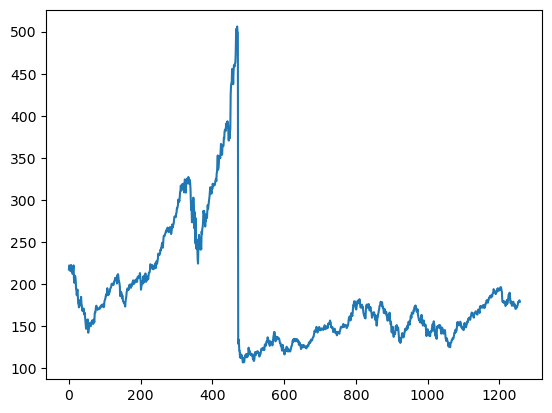

In [21]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [22]:
import numpy as np

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1, 1))


In [26]:
df2.shape

(1258, 1)

In [28]:
training_size = int(len(df2) * 0.65)
test_size = len(df2) - training_size
train_data, test_data = df2[0:training_size, :], df2[training_size:len(df2), :1]


In [30]:
training_size,test_size

(817, 441)

In [32]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)   

In [33]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [36]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [37]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
Y_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     --------------------- ------------------ 30.7

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))


In [68]:
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error' ,optimizer='adam')

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 91251 (356.45 KB)
Trainable params: 9125

In [70]:
X_train[:100]

array([[[0.27681904],
        [0.28881653],
        [0.28641202],
        ...,
        [0.16445836],
        [0.16548528],
        [0.18048842]],

       [[0.28881653],
        [0.28641202],
        [0.27346274],
        ...,
        [0.16548528],
        [0.18048842],
        [0.18552286]],

       [[0.28641202],
        [0.27346274],
        [0.28170319],
        ...,
        [0.18048842],
        [0.18552286],
        [0.18752661]],

       ...,

       [[0.16445836],
        [0.16548528],
        [0.18048842],
        ...,
        [0.25092048],
        [0.25272386],
        [0.25758297]],

       [[0.16548528],
        [0.18048842],
        [0.18552286],
        ...,
        [0.25272386],
        [0.25758297],
        [0.25532874]],

       [[0.18048842],
        [0.18552286],
        [0.18752661],
        ...,
        [0.25758297],
        [0.25532874],
        [0.26599875]]])

In [71]:
model.fit(X_train,y_train, validation_data=(X_test,ytest), epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 452ms/step - loss: 0.0368 - val_loss: 0.0010
Epoch 2/100
12/12 [==============================] - 3s 273ms/step - loss: 0.0177 - val_loss: 0.0025
Epoch 3/100
12/12 [==============================] - 3s 276ms/step - loss: 0.0196 - val_loss: 0.0026
Epoch 4/100
12/12 [==============================] - 3s 279ms/step - loss: 0.0134 - val_loss: 0.0011
Epoch 5/100
12/12 [==============================] - 3s 281ms/step - loss: 0.0109 - val_loss: 5.3215e-04
Epoch 6/100
12/12 [==============================] - 4s 319ms/step - loss: 0.0100 - val_loss: 7.7462e-04
Epoch 7/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0086 - val_loss: 5.4601e-04
Epoch 8/100
12/12 [==============================] - 3s 276ms/step - loss: 0.0079 - val_loss: 5.6610e-04
Epoch 9/100
12/12 [==============================] - 3s 277ms/step - loss: 0.0068 - val_loss: 8.0048e-04
Epoch 10/100
12/12 [==============================] - 3s 279ms/step - 

In [72]:
import tensorflow as tf

In [73]:
tf.__version__

'2.14.0'

In [81]:
train_predict=model.predict(X_train)
test_predict=model.predict(Y_test)

11/11 [==============================] - 1s 73ms/step


In [82]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [83]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

159.39884348771287

In [84]:
math.sqrt(mean_squared_error(ytest,test_predict))

159.39884348771287

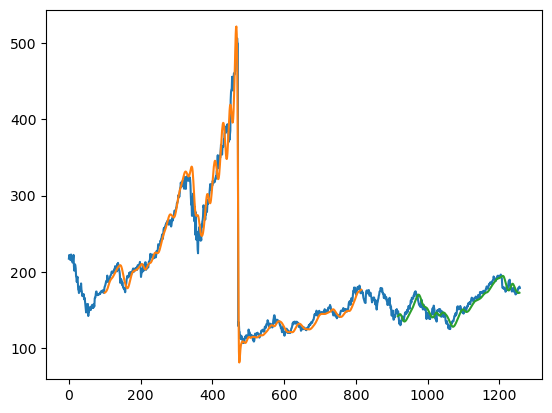

In [88]:
look_back=100
trainPredictPlot = numpy.empty_like(df2)  
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]= train_predict
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan 
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()